In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

l = sns.get_dataset_names()
df = sns.load_dataset("mpg")

In [2]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# we now make two distinct list for categorical and numerical columns names as the analysis differ for both the types. for the we introspect the dataset 
# # for each columns and if its of type object then its catogorical and else numerical


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [9]:
col = list(df.columns)
col

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [10]:
cat = list(df.select_dtypes(include = ['object']).columns)
num = list(df.select_dtypes(exclude = ["object"]).columns)

In [11]:
cat

['origin', 'name']

In [12]:
num 

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [13]:
df["name"].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64

In [14]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [15]:
cat.extend(["cylinders","model_year"])

In [16]:
cat

['origin', 'name', 'cylinders', 'model_year']

In [17]:
num

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [18]:
num.remove("cylinders")
num.remove("model_year")

In [19]:
num

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [21]:
#df.drop(columns = ["cylinders","model_year"],axis = 1)

In [22]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [23]:
6/len(df) #1.5%missing values

0.01507537688442211

In [24]:
df = df[~df.isnull().any(axis = 1)] #  "~" drops the null values without the NA values 

In [25]:
df.shape

(392, 9)

In [26]:
# find total duplicate entry and drop if any
print(f'total duplicate row:{df.duplicated().sum()}')
#drop duplicate rows if any
df = df[~df.duplicated()]
df.shape

total duplicate row:0


(392, 9)

In [27]:
for i in ['origin','name']:
    df[i]=df[i].apply(lambda x:"".join(x.split()))

In [28]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevroletchevellemalibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buickskylark320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouthsatellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amcrebelsst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,fordtorino


In [29]:
df["mpg"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [30]:
df['mpg_level'] = df['mpg'].apply(lambda x:"low" if x<17 else "high" if x>29 else "medium")

In [31]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevroletchevellemalibu,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buickskylark320,low
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouthsatellite,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amcrebelsst,low
4,17.0,8,302.0,140.0,3449,10.5,70,usa,fordtorino,medium
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,fordmustanggl,medium
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vwpickup,high
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodgerampage,high
396,28.0,4,120.0,79.0,2625,18.6,82,usa,fordranger,medium


In [32]:
cat.append('mpg_level')
print(f'categorical variables: {cat}')

categorical variables: ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


In [33]:
df =pd.concat((df[cat],df[num]),axis = 1)
df

,origin,name,cylinders,model_year,mpg_level,mpg,displacement,horsepower,weight,acceleration
0,usa,chevroletchevellemalibu,8,70,medium,18.0,307.0,130.0,3504,12.0
1,usa,buickskylark320,8,70,low,15.0,350.0,165.0,3693,11.5
2,usa,plymouthsatellite,8,70,medium,18.0,318.0,150.0,3436,11.0
3,usa,amcrebelsst,8,70,low,16.0,304.0,150.0,3433,12.0
4,usa,fordtorino,8,70,medium,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...,...,...,...,...,...
393,usa,fordmustanggl,4,82,medium,27.0,140.0,86.0,2790,15.6
394,europe,vwpickup,4,82,high,44.0,97.0,52.0,2130,24.6
395,usa,dodgerampage,4,82,high,32.0,135.0,84.0,2295,11.6
396,usa,fordranger,4,82,medium,28.0,120.0,79.0,2625,18.6


In [34]:

my_score = [23,23,4,3,66,23,63,33,21,5]
virat_score = [47,78,54,121,79,89,34,67,78,78]

In [35]:
# one smaple test
print("my  mean score :",np.mean(my_score))
print("Virat  mean score :",np.mean(virat_score))

my  mean score : 26.4
Virat  mean score : 72.5


In [36]:
# one smaple test

import scipy
from scipy.stats import stats
scipy.stats.ttest_1samp(my_score,20) # 20 is my mean score = H0

Ttest_1sampResult(statistic=0.9028523701382658, pvalue=0.3901284863419189)

In [37]:
# independent Sample T -test 
#H0 = Mean of both the scores a same
scipy.stats.ttest_ind(my_score,virat_score)

Ttest_indResult(statistic=-4.421238918607204, pvalue=0.00032961519824638394)

In [38]:
# (RELATIVE SAMPLES)paired smaple t test
my_score_second_tour = [45,56,73,55,34,77,87,92,45,45]
scipy.stats.ttest_rel(my_score,my_score_second_tour)


Ttest_relResult(statistic=-3.8284786024459283, pvalue=0.004037120339711442)

In [39]:
average_score = [40,34,44,56,50,60,76,43,66,79]

In [40]:
# # parametic test 2 - Annova - Test whether the means of two or more independent 
# samples are signifficantly different.
#  Assumption Normal distribution , Same variance , identical  distribution

In [41]:
stat,p = scipy.stats.f_oneway(my_score,average_score,virat_score)
print(stat,p)
if p>0.05:
    print('Same distribution of scores')
else:
    print('different distribution of scores')

12.266596665126634 0.0001622690052179586
different distribution of scores


In [42]:
class_1_s = [1,9,81,1,6]
class_2_s = [88,86,85,84,83]

In [43]:
stat,p =scipy.stats.mannwhitneyu(class_1_s,class_2_s)
print('stat=%.3f, p=%.3f'% (stat,p))
if p> 0.05:
    print('Same Distribution')
else:
    print('Different Distribution')
    

stat=0.000, p=0.012
Different Distribution


In [44]:
from statsmodels.stats import weightstats as stests
import scipy.stats as stats

Normality Tets : shapiro-Wilk test: Tests if the data is norrmally distributed 
        H0: Asumption:observation are identically distributed

In [45]:
def norm(df:pd.DataFrame,cols:list,alpha=0.05):
    for col in cols:
        _,p = stats.shapiro(df[col])
        if p<=alpha:
            print(f'''\nReject H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
             print(f'''\n FAil to Reject H0 due to lack of evidence  under significance level {alpha}\n{col} seems to be normally distributed''')
                
        print(p)

In [46]:
norm(df,num)


Reject H0 under significance level 0.05
mpg doesn't seems to be normally distributed
1.050049291961841e-07

Reject H0 under significance level 0.05
displacement doesn't seems to be normally distributed
8.984919193356732e-17

Reject H0 under significance level 0.05
horsepower doesn't seems to be normally distributed
5.021719107575371e-15

Reject H0 under significance level 0.05
weight doesn't seems to be normally distributed
2.6013090986820586e-11

Reject H0 under significance level 0.05
acceleration doesn't seems to be normally distributed
0.030546151101589203


In [47]:
from scipy.stats import shapiro

DataTotest = df['horsepower']
stat, p = shapiro(DataTotest)
print('stat=%.2f,p=%.30f' % (stat,p))

if p > 0.05:
    print('normal distribution')
else:
    print('Not a Normal Distribution')

stat=0.90,p=0.000000000000005021719107575371
Not a Normal Distribution


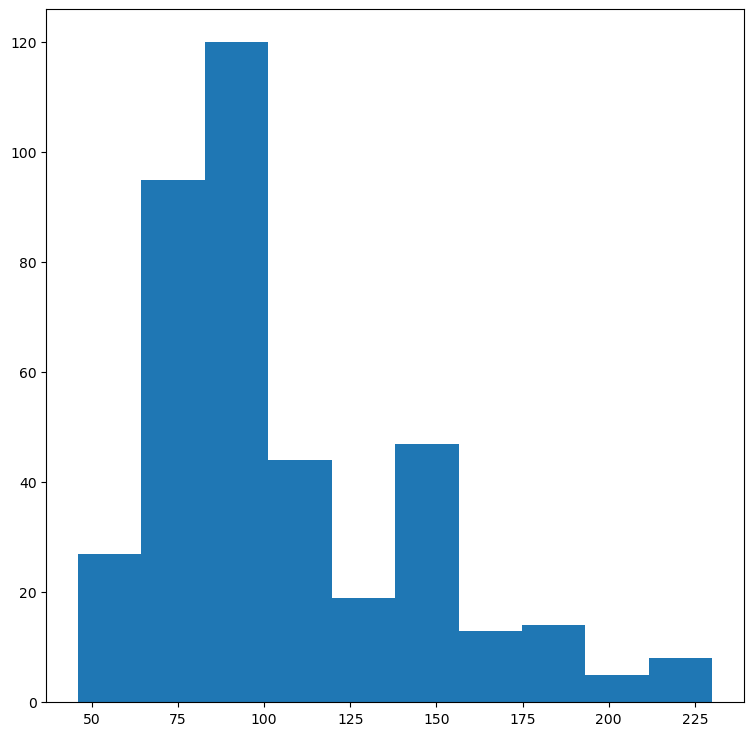

In [48]:
# visual test:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (9,9))
plt.hist(df['horsepower'])
plt.show()

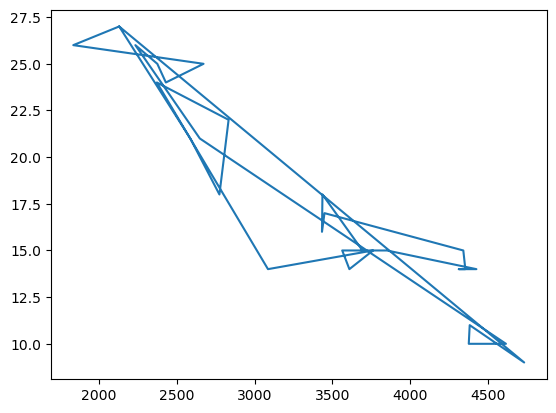

In [49]:
#correlation test: H0 : they are independent
FirstSample = df[1:30]['weight']
SecondSample = df[1:30]['mpg']

plt.plot(FirstSample,SecondSample)
plt.show()

In [50]:
from scipy.stats import spearmanr
stat,p = spearmanr(FirstSample,SecondSample)
print('stat=%.3f, p=%.7f' % (stat,p))
if p > 0.05:
    print('Independent samples')
else:
    print('dependent samples')
    

stat=-0.937, p=0.0000000
dependent samples


In [53]:
alpha = 0.05
for i in num:
    if i =='mpg':
        continue 
        # "personr", "spearmen","Kendall"
    corr, p =stats.pearsonr(df.mpg,df[i])
    print('mpg','&',i)
    
    print(f'coor:{round(corr,4)} \t p: {p}')
    
    if p <= alpha:
        print(f'Rejected H0 under siginifince level{alpha},mpg &{i} are correlated')
    else:
        print(f'Fail to Rejected H0due to lack of evidence under siginifince level{alpha},mpg &{i} are not  correlated')
    
    print()

mpg & displacement
coor:-0.8051 	 p: 1.6606418277967113e-90
Rejected H0 under siginifince level0.05,mpg &displacement are correlated

mpg & horsepower
coor:-0.7784 	 p: 7.031989029396757e-81
Rejected H0 under siginifince level0.05,mpg &horsepower are correlated

mpg & weight
coor:-0.8322 	 p: 6.0152960514349416e-102
Rejected H0 under siginifince level0.05,mpg &weight are correlated

mpg & acceleration
coor:0.4233 	 p: 1.7785761248043974e-18
Rejected H0 under siginifince level0.05,mpg &acceleration are correlated

